In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.linalg as la
from scipy.interpolate import lagrange
from scipy.interpolate import CubicHermiteSpline
import scipy.interpolate
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import newton, bisect, root_scalar, fixed_point
from scipy.integrate import trapezoid, simpson

# Parcial/Taller Métodos Computacionales
**2024-2**

---

*Nombre:* Soleil Dayana Niño Murcia

*Identificación:* 1033097666

---
* Sea honest@
* $\color{red}{\text{La parte escrita del parcial/taller NO tendrá validez si no es sustentado
}}$
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Todo lo que presente aquí será sujeto a evaluación.
* **Debe subirlo a carpeta de GitHub del curso antes del lunes 16 de diciembre a las 11:59 p.m.**

#1
Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.

In [2]:
q = 2e-5 # Coulombs
Q = 2e-5 # Coulmbs
E0 = 8.854e-12 # Faradios sobre metro
k = 1 / (4 * np.pi * E0)

x, a = sp.symbols('x a')

f_fuerza = (k * q * Q * x )/(x**2 + a**2)**(3/2)
fl_fuerza = sp.lambdify((x,a), f_fuerza)

display(f_fuerza)

3.59509697519529*x/(a**2 + x**2)**1.5

  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m


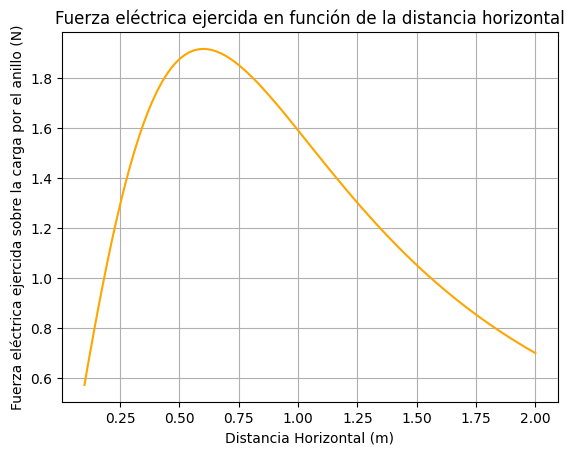

In [3]:
x_acotado = np.linspace(0.1, 2, 100)
fl_fuerza(x_acotado, 0.85)

plt.plot(x_acotado, fl_fuerza(x_acotado, 0.85), color = 'orange')
plt.xlabel('Distancia Horizontal (m)')
plt.ylabel('Fuerza eléctrica ejercida sobre la carga por el anillo (N)')
plt.title('Fuerza eléctrica ejercida en función de la distancia horizontal')
plt.grid(True)
plt.show()

La gráfica muestra que la fuerza eléctrica ejercida sobre la carga por el anillo aumenta inicialmente con la distancia horizontal, alcanza un máximo y luego disminuye gradualmente.

  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.


In [4]:
# Hallando x tal que F = 1.25N (para radio del anillo fijo de a=0.85) por:

## Newton-Raphson
f_f =  (k * q * Q * x )/(x**2 + 0.85**2)**(3/2) # Nueva función con valor de radio fijo para tener una sola variable
df = sp.diff(f_f, x) # Derivada

fl = sp.lambdify((x), f_f) # Convirtiendo tipo lambda
dfl = sp.lambdify((x), df)

target = 1.25 # (N) Valor de la fuerza que se busca

def f_newton(x): #¿?
  return fl(x) - target

def df_newton(x):
  return dfl(x)

x_newton = newton(f_newton, 1.0, fprime=df_newton, tol=1e-6) # Aplicando Newton de la librería

print(f"Distancia horizontal estimada en que la fuerza equivale a 1.25N mediante:\n a.) Newton-Raphson: x ~ {x_newton:.3f} m.")

## Otro método: Punto Fijo
x_pf = fixed_point(lambda x: fl(x), 1.0)

print(f" b.)Punto fijo: x ~ {x_pf:.3f} m.")

Distancia horizontal estimada en que la fuerza equivale a 1.25N mediante:
 a.) Newton-Raphson: x ~ 1.297 m.
 b.)Punto fijo: x ~ 1.274 m.


In [5]:
# Verificando el valor de x al evaluar en la función (obtener F = 1.25N)
print(f"F por Newton = {fl_fuerza(x_newton, 0.85):.4} N\nF por Punto Fijo = {fl_fuerza(x_pf, 0.85):.4}N.")

F por Newton = 1.25 N
F por Punto Fijo = 1.274N.


  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

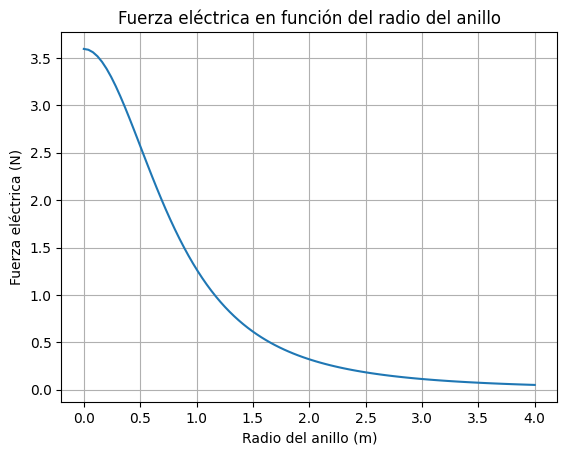

In [6]:
a_values = np.linspace(0,  4, 100) # Radio del anillo
x = 1 # Dejar una distancia horizontal fija para la prueba

fuerzas = []
for a in a_values:
  fuerza = fl_fuerza(x, a)
  fuerzas.append(fuerza)

plt.plot(a_values, fuerzas)
plt.xlabel('Radio del anillo (m)')
plt.ylabel('Fuerza eléctrica (N)')
plt.title('Fuerza eléctrica en función del radio del anillo')
plt.grid(True)

La fuerza eléctrica **disminuye** al aumentar el radio del anillo debido al aumento en la distancia promedio entre la carga q y las cargas distribuidas en el anillo, lo cual se refleja en la gráfica.
Esto quiere decir que asimismo, la fuerza eléctrica aumenta al disminuir el radio del anillo.


# 2

La ley de Planck expresa la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico:

$$
u(\lambda, T) = \frac{8 \pi h c}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1},
$$

donde $T$ es la temperatura de equilibrio, $\lambda$ es la longitud de onda, $h = 6.62606957 \times 10^{-34} \ \text{J·s}$ es la constante de Planck, $k_B = 1.3806488 \times 10^{-23} \ \text{J·K}^{-1}$ es la constante de Boltzmann, y $c = 2.99792458 \times 10^8 \ \text{m·s}^{-1}$ es la velocidad de la luz en el vacío. La función $u(\lambda, T)d\lambda$ representa la energía radiada en el intervalo espectral $(\lambda, \lambda + d\lambda)$.

Introduciendo la variable adimensional

$$
x = \frac{\lambda}{\lambda_0},
$$

y los parámetros dependientes de la temperatura:

$$
\lambda_0 = \frac{h c}{k_B T}, \quad K = \frac{8 \pi k_B T}{\lambda_0^4},
$$

la ley de Planck se convierte en:

$$
u(\lambda, T) = K \frac{1}{x^5 \left(e^{1/x} - 1\right)}.
$$

La ley de desplazamiento de Wien establece que, para un cuerpo negro, la longitud de onda $\lambda_{\text{max}}$ correspondiente al máximo de $u(\lambda, T)$ es inversamente proporcional a la temperatura $T$ o, equivalentemente:

$$
\lambda_{\text{max}} T = 2.897768 \times 10^{-3} \ \text{m·K}.
$$




* Escriba una función para la densidad espectral como función de $\lambda$ y $T$


$$
u(\lambda, T) = \frac{8 \pi h c}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1}
$$



In [7]:
l, T = sp.symbols('lambda T') # Parámetros

# Constantes
h =  6.62606957e-34 # (J*s) Constante de Planck
kb = 1.3806488e-23 # (J/K) Constante de Boltzmann
c = 2.99792458e8 # (m/s) Velocidad de la luz en el vacío
numerador = 8 * np.pi * h * c
exponencial = sp.exp(h * c / (l * kb * T))

spectral_density = numerador / (l**5 * (exponencial - 1))
l_spectral_density = sp.lambdify((l, T), spectral_density)

display(spectral_density)

4.9924825322512e-24/(lambda**5*(exp(0.0143877695998382/(T*lambda)) - 1))

* Graficar la densidad espectral de energía $u(\lambda, T)$ para temperaturas de equilibrio $T = 2000, 4000, 6000$ y $8000 \ \text{K}$.



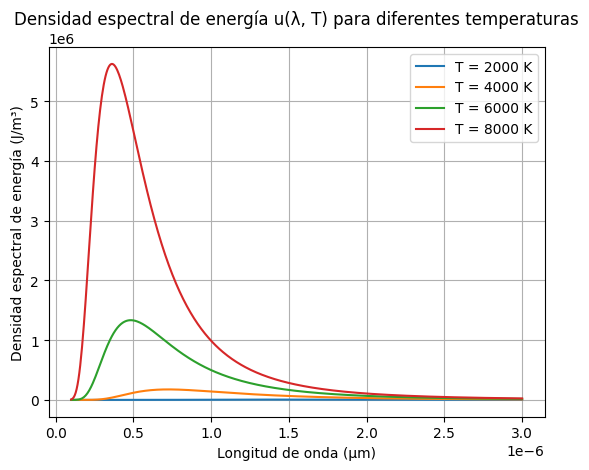

In [8]:
T_values = [2000, 4000, 6000, 8000]
wavelengths = np.linspace(1e-7, 3e-6, 500)  # 500 puntos entre 100 nm y 3 μm

for i in T_values:
  s = l_spectral_density(wavelengths, i)
  plt.plot(wavelengths, s, label=f'T = {i} K')
plt.title("Densidad espectral de energía u(λ, T) para diferentes temperaturas")
plt.xlabel("Longitud de onda (μm)")
plt.ylabel("Densidad espectral de energía (J/m³)")
plt.legend()
plt.grid(True)

La  gráfica tiene un comportamiento acorde a la Ley de Planck, pues a medida que aumenta la temperatura, la curva se desplaza hacia longitudes de onda más cortas (más energéticas) y la intensidad máxima (pico de la curva) también aumenta.

Por eso para temperaturas más altas (T = 8000K), el pico se desplaza hacia la izquierda (menor longitud de onda, cerca del ultravioleta). Mientras que para temperaturas más bajas, el pico de densidad espectral sucede a longitudes de onda más largas.

* Encuentre de manera simbólica $\frac{\partial u(\lambda, T)}{\partial \lambda} $ y realice un gráfico para las temperaturas y longitudes de onda usadas en el numeral anterior.



In [9]:
spectral_density = numerador / (l**5 * (exponencial - 1))
derivada_espectral = sp.diff(spectral_density, l)

dl_espectral = sp.lambdify((l, T), derivada_espectral)
display(derivada_espectral)

-2.4962412661256e-23/(lambda**6*(exp(0.0143877695998382/(T*lambda)) - 1)) + 7.18306884052468e-26*exp(0.0143877695998382/(T*lambda))/(T*lambda**7*(exp(0.0143877695998382/(T*lambda)) - 1)**2)

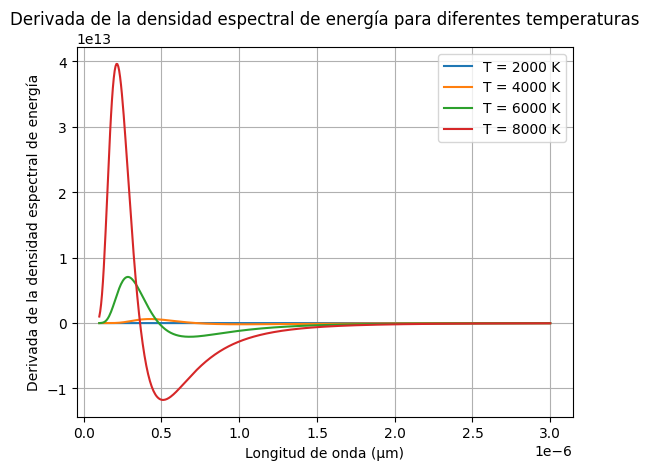

In [10]:
T_values = [2000, 4000, 6000, 8000]
wavelengths = np.linspace(1e-7, 3e-6, 500)

for i in T_values:
  s = dl_espectral(wavelengths, i)
  plt.plot(wavelengths, s, label=f'T = {i} K')
plt.title("Derivada de la densidad espectral de energía para diferentes temperaturas")
plt.xlabel("Longitud de onda (μm)")
plt.ylabel("Derivada de la densidad espectral de energía")
plt.legend()
plt.grid(True)
plt.show()

* Hallar el máximo de $u(\lambda, T)$ para la radiación electromagnética del Sol, considerando la temperatura efectiva de la fotosfera $T = 5778 \ \text{K}$. Usar el método numérico de Newton para la derivada y comprobar la validez de la ley de Wien.

In [11]:
from scipy.optimize import fsolve
# Para hallar el máximo, podemos encontrar el punto donde la derivada es cero usando Newton
T_sol = 5778 # Temperatura efectiva de la fotosfera (K)
l_0 = 5e-7 # Valor inicial para aplicar newton

def dl_espectral_fsolve(l):
    return dl_espectral(l, T_sol)

l_max_fsolve = fsolve(dl_espectral_fsolve, l_0)

print(f"Longitud de onda para la radiación máxima (fsolve): {l_max_fsolve[0]:.2e} m")
u_max_fsolve = l_spectral_density(l_max_fsolve[0], T_sol)
print(f"Densidad espectral máxima (fsolve): {u_max_fsolve:.2e} J/m³")

Longitud de onda para la radiación máxima (fsolve): 5.02e-07 m
Densidad espectral máxima (fsolve): 1.11e+06 J/m³


Ley de Wien:
$$
\lambda_{\text{max}} T = 2.897768 \times 10^{-3} \ \text{m·K}.
$$

In [12]:
Wien = 2.897768e-3
proof_law = l_max_fsolve*T_sol
print(proof_law)
if int(proof_law) == int(Wien):
  print( "Se cumple la Ley de Wien :)")

[0.00289777]
Se cumple la Ley de Wien :)


C:\Users\marin\AppData\Local\Temp\ipykernel_13484\4195753524.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(proof_law) == int(Wien):


#3

La siguiente función describe la distribución de temperatura de una placa rectangular para $-2.0\leq x \leq 0$ y $0\leq y\leq 3$

$$T(x,y) = 2 + x - y + 2x^2 + 2xy + y^2$$


* Desarrolle una función para la $T(x,y)$.

In [13]:
x, y = sp.symbols('x y')
T_ = 2 + x - y + 2*x**2 + 2*x*y + y**2
T = sp.lambdify((x,y), T_)
display(T_)

2*x**2 + 2*x*y + x + y**2 - y + 2

* Haga un dataframe con los valores de $x$, $y$ y $T$ tomando 50 datos en total y realice un gráfico de calor para la placa metálica. *Ayuda: emplee `np.meshgrid` y `plt.pcolormesh`*.


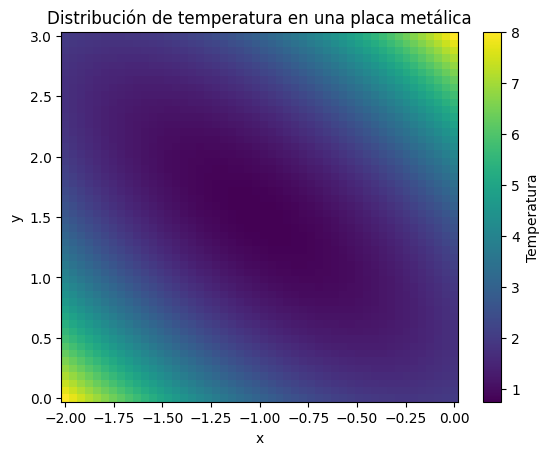

,x,y,T
0,-2.000000,0.000000,8.000000
1,-1.959184,0.061224,7.420242
2,-1.918367,0.122449,6.864640
3,-1.877551,0.183673,6.333195
4,-1.836735,0.244898,5.825906
5,-1.795918,0.306122,5.342774
6,-1.755102,0.367347,4.883798
7,-1.714286,0.428571,4.448980
8,-1.673469,0.489796,4.038317
9,-1.632653,0.551020,3.651812


In [14]:
# Toma 50 datos en los intervalos dados
xlinspace = np.linspace(-2, 0, 50)
ylinspace = np.linspace(0, 3, 50)

T_values = T(xlinspace, ylinspace) # Evaluo la funcion en los 50 datos para hallar la temperatura
df = pd.DataFrame({'x': xlinspace, 'y': ylinspace, 'T': T_values.flatten()}) # Crea el df

# Aplica el meshgrid a los datos
x_mesh, y_mesh = np.meshgrid(xlinspace, ylinspace)
T_mesh = T(x_mesh, y_mesh)

# Gráfico de calor
plt.pcolormesh(x_mesh, y_mesh, T_mesh)
plt.colorbar(label='Temperatura')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución de temperatura en una placa metálica')
plt.show()
df

* Ahora, utilizando unicamente 9 puntos $(x,y)$ de $T$, use la interpolación de Lagrange para encontrar el valor de $T(-1.63, 1.627)$, y determine el error absoluto y relativo.


In [15]:
x9vals_ = np.linspace(-2, 0, 9)
y9vals_ = np.linspace(0, 3, 9)

""" Lagrange no funciona para funciones multivariadas, no es posible aplicar este método ;)"""

' Lagrange no funciona para funciones multivariadas, no es posible aplicar este método ;)'

* Realice el mismo procedimiento anterior para Splines Cúbicas.

In [16]:
from scipy.interpolate import CubicSpline

x_eval, y_eval = -1.63, 1.627 # Puntos para evaluar
T_real = T(x_eval, y_eval)

cs = CubicSpline(df['x'], df['y'])
eval = cs(x_eval, y_eval)
print(f'T en ({x_eval}, {y_eval}) = {eval:.2f}')

e_abs_spline = abs(T_real - eval)
e_rel_spline = e_abs_spline / abs(T_real)

print(f"Error absoluto: {e_abs_spline:.4f}")
print(f"Error relativo: {e_rel_spline:.4f}")

T en (-1.63, 1.627) = 1.50
Error absoluto: 0.1001
Error relativo: 0.0715


#4
Usando los siguiente datos realice lo siguiente:



```python
x = [-5.      -3.33333 -1.66667  0.       1.66667  3.33333  5.     ]

y = [1.48672e-06 1.54228e-03 9.94771e-02 3.98942e-01 9.94771e-02 1.54228e-03
 1.48672e-06]
```



* Lealos y grafiquelos en un dataframe.


In [17]:
x = [-5., -3.33333, -1.66667, 0, 1.66667, 3.33333, 5]
y = [1.48672e-06, 1.54228e-03, 9.94771e-02, 3.98942e-01, 9.94771e-02, 1.54228e-03, 1.48672e-06]

df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,-5.00000,0.000001
1,-3.33333,0.001542
2,-1.66667,0.099477
3,0.00000,0.398942
4,1.66667,0.099477
5,3.33333,0.001542
6,5.00000,0.000001


Text(0, 0.5, 'y')

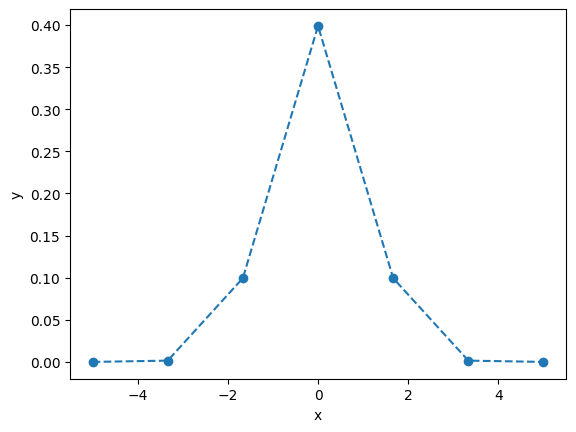

In [18]:
plt.plot(df['x'], df['y'], '--o')
plt.xlabel('x')
plt.ylabel('y')

* Usando interpolación de Lagrange, encuentre el polinomio asociado y grafiquelo.


In [19]:
x, y = df['x'], df['y']
P = lagrange(x, y)

pol_lagrange =  np.poly1d(P)
print(pol_lagrange)

            6             5           4             3          2
-0.0003248 x - 2.827e-19 x + 0.01316 x - 1.475e-17 x - 0.1418 x - 2.893e-17 x + 0.3989


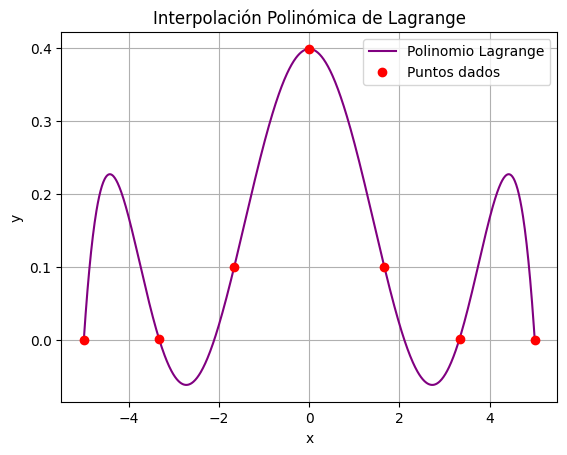

In [20]:
#  Gráfica del polinomio de Lagrange

x_ = np.linspace(min(x), max(x), 1000)
y_plot = pol_lagrange(x_) # Evalúa el polinomio en el linspace

plt.plot(x_, y_plot, label='Polinomio Lagrange', color = 'purple')
plt.plot(x, y, 'o', label='Puntos dados', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación Polinómica de Lagrange')
plt.legend()
plt.grid(True)

* Ahora, use la interpolación de Hermite para obtener el polinomio.


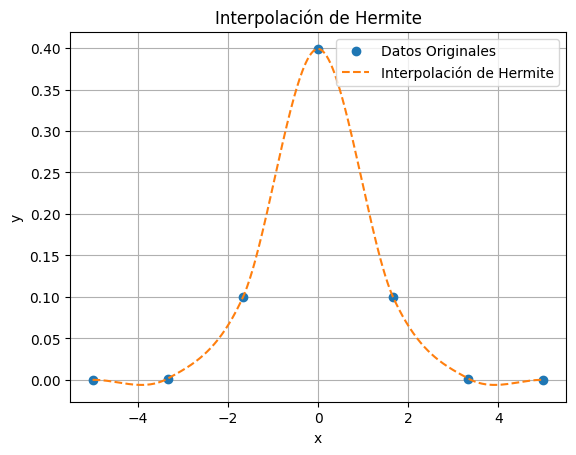

In [21]:
# Hay que aplicar diferencias finitas para determinar las derivadas y aplicar Hermite
dydx  =  np.gradient(y,x)
hermite_spline = CubicHermiteSpline(x, y, dydx)

x_interp = np.linspace(-5, 5, 500)
y_interp = hermite_spline(x_interp)

plt.plot(x, y, 'o', label='Datos Originales')
plt.plot(x_interp, y_interp, '--', label='Interpolación de Hermite')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Hermite')
plt.grid()
plt.show()

* Sabemos que los puntos parten de la distribución normal que se define como:
$$f(x) = \frac{1}{\sqrt{2\pi}}\exp^{-x^2/2}$$



* Haga una gráfica de $f(x)$ y comparela con los polinomios anteriores en función del error.


In [22]:
x  = sp.symbols('x')
f_4 = sp.exp(-x**2/2)/sp.sqrt(2*sp.pi)
fl_4 = sp.lambdify(x, f_4)
display((f_4))

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

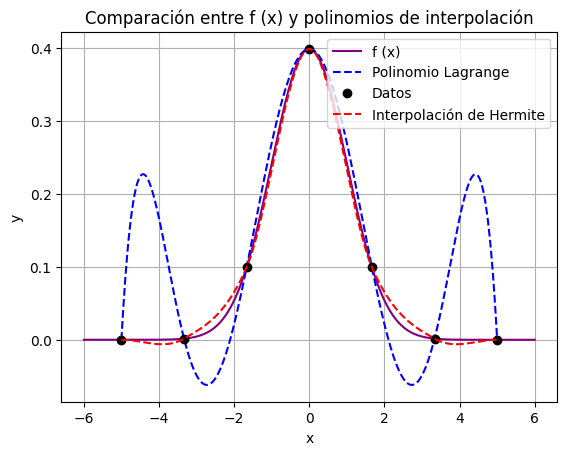

In [23]:
x_values = np.linspace(-6, 6, 1000)
y_values = fl_4(x_values)

plt.plot(x_values, y_values, color = 'purple', label = 'f (x)')
plt.plot(x_, y_plot,  '--', label='Polinomio Lagrange', color = 'blue')
plt.plot(df['x'], df['y'], 'o', label='Datos', color = 'black')
plt.plot(x_interp, y_interp,'--', label='Interpolación de Hermite', color = 'red')
plt.title('Comparación entre f (x) y polinomios de interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

In [24]:
error_hermite = abs(fl_4(x_interp) - y_interp)
error_lagrange = abs(fl_4(x_) - y_plot)

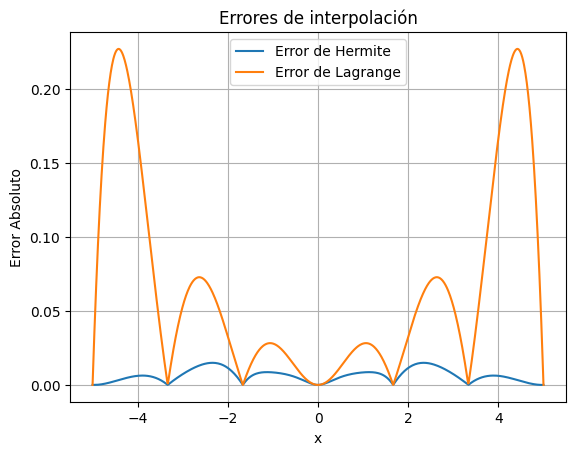

In [25]:
plt.plot(x_interp, error_hermite, label='Error de Hermite')
plt.plot(x_, error_lagrange, label='Error de Lagrange')
plt.xlabel('x')
plt.ylabel('Error Absoluto')
plt.title('Errores de interpolación')
plt.legend()
plt.grid(True)

La interpolación de Lagrange presenta, como siempre, muchas más oscilaciones al rededor de los puntos, generando mayor error.

* Encuentre los puntos de inflexión para $f(x)$ númericamente, y compare con el valor exacto. Halle el error absoluto.


In [26]:
# Hallar las raíces de la segunda derivada arroja los puntos de inflexion
dfdx2 = sp.diff(f_4, x, 2) # Segunda derivada de f(x)
ldfdx2 = sp.lambdify(x, dfdx2)
display(dfdx2)

sqrt(2)*(x**2 - 1)*exp(-x**2/2)/(2*sqrt(pi))

In [27]:
roots = []
for i in np.linspace(-3, 3, 1000): # Por los métodos vistos no llego a raices sensatas :c
    if abs(ldfdx2(i)) < 1e-6:
        roots.append(i)
print(f"Puntos de inflexión hallados: {roots}")

exact_inflection_points = np.array([-1, 1]) # Los puntos de inflexión de una distribución normal están en x = -1 y 1
print(f"Puntos exactos de inflexión de una distribución normal: {exact_inflection_points}")
error_inflection = abs(exact_inflection_points - roots)
print(f"Error absoluto de los puntos de inflexión: {error_inflection}")

Puntos de inflexión hallados: [-1.0, 1.0]
Puntos exactos de inflexión de una distribución normal: [-1  1]
Error absoluto de los puntos de inflexión: [0. 0.]


In [28]:
prueba = ldfdx2(roots[0])
print(f"Valor de la segunda derivada en los puntos de inflexión: {prueba}")

Valor de la segunda derivada en los puntos de inflexión: 0.0


* Integre la función entre $-1\leq x\leq 1$ y para $-3\leq x\leq 3$. Si el área total de $-\infty \leq x\leq \infty $ deber ser igual a 1, a que proporción de la curva hacen parte los intervalos del punto anterior.

In [29]:
f = lambda x: fl_4(x)

a,b  = -1, 1 # Intervalo de integración
x_ = np.linspace(a, b, 100)

i_trapezoidal_1 = trapezoid(f(x_), x_)
i_simpson_1 = simpson(f(x_), x=x_)

a2,b2  = -3, 3 # *x
x2_ = np.linspace(a2, b2, 100)

i_trapezoidal_2 = trapezoid(f(x2_), x2_)
i_simpson_2 = simpson(f(x2_), x=x2_)

print(f"Área bajo la curva entre {a} y {b}: \n  - Método Trapezoidal: {i_trapezoidal_1:.4f}\n  - Método Simpson: {i_simpson_1:.4f}")
print(f"Área bajo la curva entre {a2} y {b2}: \n  - Método Trapezoidal: {i_trapezoidal_2:.4f}\n  - Método Simpson: {i_simpson_2:.4f}")

Área bajo la curva entre -1 y 1: 
  - Método Trapezoidal: 0.6827
  - Método Simpson: 0.6827
Área bajo la curva entre -3 y 3: 
  - Método Trapezoidal: 0.9973
  - Método Simpson: 0.9973


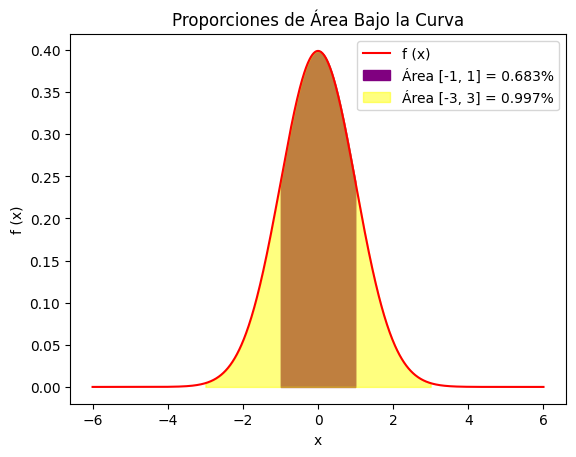

In [30]:
plt.plot(x_values, y_values, color = 'r', label='f (x)')
plt.fill_between(x_values, y_values, where=((x_values >= -1) & (x_values <= 1)), color='purple', label=f"Área [-1, 1] = {i_simpson_1:.3f}%")
plt.fill_between(x_values, y_values, where=((x_values >= -3) & (x_values <= 3)), color='yellow', alpha=0.5, label= f"Área [-3, 3] = {i_simpson_2:.3f}%")

plt.title('Proporciones de Área Bajo la Curva')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.legend()
plt.show()

#5

La función de onda del electrón en un estado $2s$ $(n = 2, l = 0, \text{ y } m = 0)$ dentro del átomo de hidrógeno puede definirse en unidades radiales adimensionales como:

$$ \psi_{200}(r, \theta, \varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}. $$

La probabilidad de que el electrón se localice entre las posiciones radiales $r = 0$ y $R$ se da por:

$$ \int_{0}^{R} \int_{0}^{\pi} \int_{0}^{2\pi} |\Psi_{210}(r, \theta, \varphi)|^2 r^2 \, dr \, \sin \theta \, d\theta \, d\varphi = \frac{1}{8} \int_{0}^{R} r^2 (2 - r)^2 e^{-r} \, dr. $$

* Realiza una gráfica de la función de onda para $0\leq r\leq 10$. Luego encuentra la función densidad de probabilidad $|\psi_{200}(r, \theta, \varphi)|^2$ y graficala, hallando su máximo utilizando un método númerico de derivación.


In [31]:
r, theta, phi = sp.symbols('r theta phi') # Variables
f_onda = (2 - r) * sp.exp(-r/2) / (4 * sp.sqrt(sp.pi * 2)) # Función de onda
fl_onda = sp.lambdify([r, theta, phi], f_onda, "numpy")
display(f_onda)

sqrt(2)*(2 - r)*exp(-r/2)/(8*sqrt(pi))

In [32]:
densidad_probabilidad = lambda r: np.abs(fl_onda(r, 0, 0))**2 * r**2

In [33]:
r_values = np.linspace(0, 10, 1000)
theta_values = np.linspace(0, np.pi, 100)
phi_values = np.linspace(0, 2*np.pi, 100)

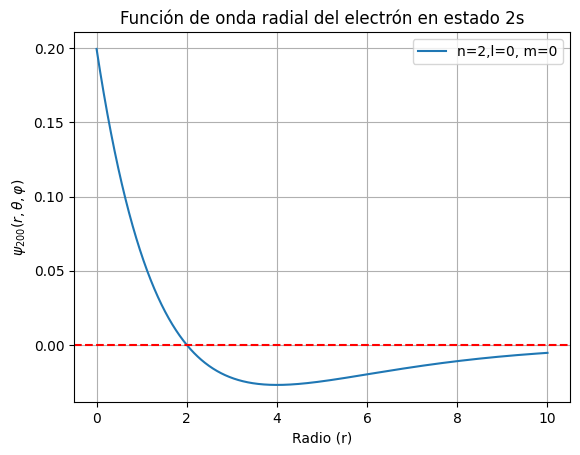

In [34]:
# Gráfica de densidad de probabilidad
onda_values = fl_onda(r_values, 0, 0)

plt.plot(r_values, onda_values, label='n=2,l=0, m=0')
plt.xlabel('Radio (r)')
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel(r'$\psi_{200}(r, \theta, \varphi)$')
plt.title('Función de onda radial del electrón en estado 2s')
plt.legend()
plt.grid(True)
plt.legend()

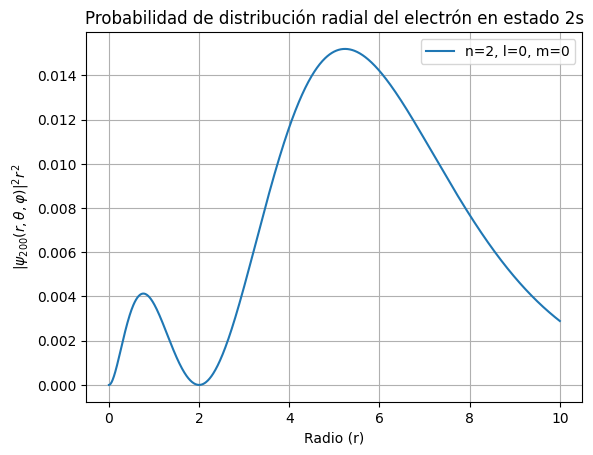

In [35]:
dens_prob_values = densidad_probabilidad(r_values)
plt.plot(r_values, dens_prob_values, label='n=2, l=0, m=0')
plt.xlabel('Radio (r)')
plt.ylabel(r'$|\psi_{200}(r, \theta, \varphi)|^2 r^2$')
plt.title('Probabilidad de distribución radial del electrón en estado 2s')
plt.legend()
plt.grid(True)

* Calcula las probabilidades de encontrar el electrón entre las posiciones radiales $ r = 0 $ y $ R \in [10, 25] $, con incrementos iguales a 1, utilizando el método de Romberg con una precisión relativa $ \epsilon = 10^{-8} $.


In [36]:
from scipy.integrate import romberg

R = np.arange(10, 26, 1)
epsilon = 1e-8
probabilidades = []

print('Probabilidad de que el electrón se encuentre en:')
for R in R:
  prob_ronberg =  romberg(densidad_probabilidad, 0, R, tol=epsilon)
  probabilidades.append(prob_ronberg)
  print(f"R = {R}: {prob_ronberg}")

Probabilidad de que el electrón se encuentre en:
R = 10: 0.07484107551483411
R = 11: 0.07704873239034543
R = 12: 0.07826857680023253
R = 13: 0.07891759120140632
R = 14: 0.07925224131204144
R = 15: 0.07942029835486639
R = 16: 0.07950281150450716
R = 17: 0.07954254164588156
R = 18: 0.07956134879873894
R = 19: 0.07957011909628445
R = 20: 0.07957415487050665
R = 21: 0.07957599004027535
R = 22: 0.07957681566894945
R = 23: 0.07957718353726577
R = 24: 0.07957734601726463
R = 25: 0.07957741720859587


C:\Users\marin\AppData\Local\Temp\ipykernel_13484\1375526499.py:9: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  prob_ronberg =  romberg(densidad_probabilidad, 0, R, tol=epsilon)



* Calcula la integral radial desde $ r = 0 $ hasta $ \infty $ utilizando las rutinas de integración `quad` simple y adaptativa. Verifica que la probabilidad total de encontrar el electrón en cualquier parte del espacio es, de hecho, igual a 1.

In [37]:
from scipy.integrate import quad
def f_o(r):
  return (2-r)* np.exp(-r/2) / (4 * np.sqrt(np.pi * 2))
integrate = quad(lambda r : 1/8 * r **2 * (2-r)**2 * np.exp(-r), 0, np.inf )
inter = quad(lambda r: r**2 * f_o(r)**2* 4*np.pi,  0, np.inf)
print(f"Integral simple: {integrate[0]}")
print(f"Integral adaptativa: {inter[0]:.2f}")

Integral simple: 1.0
Integral adaptativa: 1.00


# 6

Imagina que estamos estudiando el movimiento de un proyectil lanzado desde una altura inicial con una velocidad inicial en un ángulo específico. Queremos analizar el trayecto del proyectil, su altura máxima y la distancia que recorre antes de tocar el suelo.

La ecuación de la trayectoria del proyectil en términos de la distancia horizontal $x$ y la altura $y$ es:

$$ y(x) = y_0 + x \tan(\theta) - \frac{g x^2}{2 v_0^2 \cos^2(\theta)} $$

* Grafica la trayectoria del proyectil para los siguientes parámetros: $ y_0 = 1 \, \text{m} $, $ \theta = 45^\circ $, y $ v_0 = 20 \, \text{m/s} $.




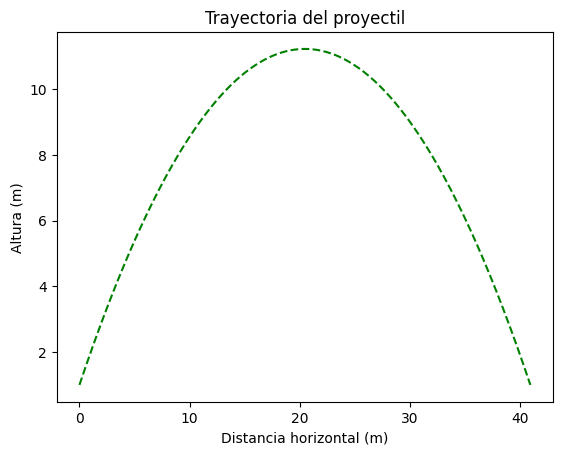

In [38]:
y0, theta_rad, v0, g = 1, np.radians(45), 20, 9.77 # Parámetros
x = sp.symbols('x')
y = y0 + x * sp.tan(theta_rad) - (g * x**2) / (2 * v0**2 * sp.cos(theta_rad)**2)
y = sp.lambdify(x, y) # Convirtiendo tipo lambda

x_values = np.linspace(0, (2 * v0**2 * np.sin(theta_rad) * np.cos(theta_rad)) / g, 500) # poke?
y_values = y(x_values)

plt.plot(x_values, y_values, '--g')
plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Altura (m)')
plt.title('Trayectoria del proyectil')
plt.show()

* Calcula la altura máxima alcanzada por el proyectil a través de la derivada númerica y compara con el valor real.



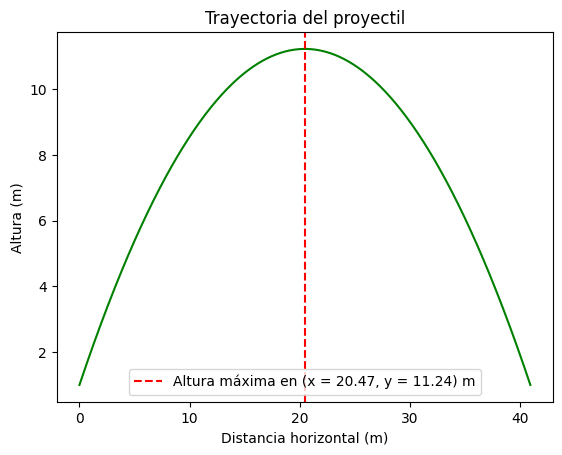



- Altura máxima alcanzada: ~11.2 m


In [39]:
y_sym = y0 + x * sp.tan(theta_rad) - (g * x**2) / (2 * v0**2 * sp.cos(theta_rad)**2)
y = sp.lambdify(x, y_sym)
dy_sym = sp.diff(y_sym, x) # Derivada simbolica
dy = sp.lambdify(x, dy_sym)  # Func. lambda
x0 = (v0**2 * np.sin(2 * theta_rad)) / (2*g)   # Valor teórico en x que genera el mayor valor en y
root = newton(dy, x0, tol = 1e-6) # Aplica N-R para hallar la raiz
max_height = y(root) # Calcula la altura maxima usando la funcion lambda y, evaluando en la raiz encontrada

plt.plot(x_values, y_values, '-g')
plt.axvline(root, color='r', linestyle='--', label=f"Altura máxima en (x = {root:.2f}, y = {max_height:.2f}) m")
plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Altura (m)')
plt.title('Trayectoria del proyectil')
plt.legend()
plt.show()

print(f"\n\n- Altura máxima alcanzada: ~{max_height:.1f} m")

In [40]:
valor_real = 11.19 # Tomado empleando el simulador PHET
error = abs(valor_real - max_height)
print(f"Error absoluto: {error:.2f} m")

Error absoluto: 0.05 m


* Encuentra la distancia horizontal total recorrida por el proyectil antes de tocar el suelo, esto implica encontrar la raíz de la ecuación $ y(x) = 0 $.



In [41]:
x_max = newton(y, 40)
print(f'Distancia horizontal máxima recorrida por el proyectil: ~ {x_max:.2f}m.')

Distancia horizontal máxima recorrida por el proyectil: ~ 41.92m.


* Toma los valores de la trayectoria del proyectil en puntos de $ x \in \{0, 2, 4, 6, 8, 10\} $ y usa dos técnicas de interpolación para estimar la trayectoria en puntos intermedios.



In [42]:
puntos = [0, 2, 4, 6, 8, 10]
intermedios = [1,3,5,7,9]
y_puntos = []

for i in puntos:
  y_puntos.append(y(i))
  print(f'y({i}) = {y(i)}') # Alturas en los puntos dados

# Interpolando por Hermite Spline
dy_puntos = [dy(p) for p in puntos]
hermite_interp = CubicHermiteSpline(puntos, y_puntos, dy_puntos)
y_interp_hermite = hermite_interp(intermedios)

# Interpolando por Lagrange
interpolador_lagrange = lagrange(puntos, y_puntos)
y_interp_lagrange = interpolador_lagrange(intermedios)

y(0) = 1.0
y(2) = 2.9023000000000003
y(4) = 4.6091999999999995
y(6) = 6.1207
y(8) = 7.4368
y(10) = 8.557500000000001


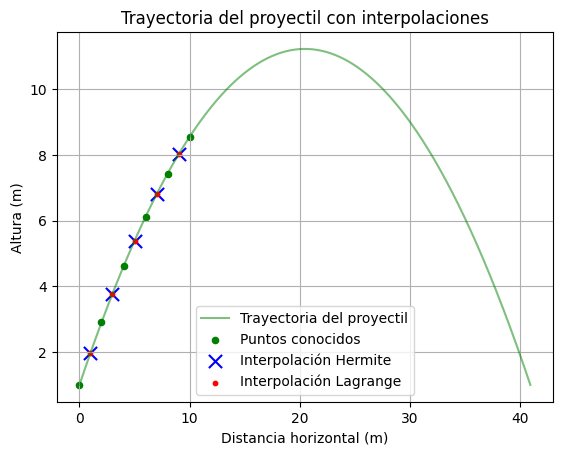

In [43]:
plt.plot(x_values, y_values, label='Trayectoria del proyectil', color='green', alpha = 0.5)
plt.scatter(puntos, y_puntos, color='green', label='Puntos conocidos', s=20) # Puntos conocidos

# Intermedios con interpolaciones
plt.scatter(intermedios, y_interp_hermite, color='blue', marker = 'x', label='Interpolación Hermite', s=90)
plt.scatter(intermedios, y_interp_lagrange, color='red', marker = 'o', label='Interpolación Lagrange', s=10)

plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Altura (m)')
plt.title('Trayectoria del proyectil con interpolaciones')
plt.legend()
plt.grid(True)
plt.show()

* Si conocemos que:
$$y(t) = y_0 + v_{0y}t -\frac{1}{2}gt^2$$
encuentre el tiempo de vuelo para el proyectil. Luego, usando un método de integración encuentre cuál seria la altura alcanzada entre $0\leq t\leq 2$s.


In [44]:
v0y = v0 * np.sin(theta_rad) # Despejando v0
a, b, c = -g/2, v0y, y0

raices = np.roots([a,b,c])
t_vuelo = raices[raices > 0][0]  # Tomamos la raíz positiva
print(f"El tiempo de vuelo es de ~ {t_vuelo:.2f} s.")

El tiempo de vuelo es de ~ 2.96 s.


In [45]:
a,b  = 0,2
yt = lambda t: y0 + v0 * t - (g * t**2) / 2 # Funcion de altura
t = np.linspace(a, b, 100)

# Adicional: Distancia horizontal alcanzada en el intervalo integrando
x_integral_trapezoidal = trapezoid(yt(t), t)
x_integral_simpson = simpson(yt(t), x=t)
print("Distancia en t=2 por Integral trapezoidal:", x_integral_trapezoidal, 'm')
print("Distancia en t=2 por Integral Simpson:", x_integral_simpson)

Distancia en t=2 por Integral trapezoidal: 28.972668775295038 m
Distancia en t=2 por Integral Simpson: 28.973333333333333
